## 1. Importing the required libraries

In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time
import numpy as np
import pandas as pd

## 2. Loading the dataset

In [2]:
df = pd.read_csv("iot23_final_dataset.csv")

## 3. Exploratory Data Analysis

In [3]:
df.shape

(1444674, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1444674 non-null  int64  
 1   duration           1444674 non-null  float64
 2   orig_bytes         1444674 non-null  int64  
 3   resp_bytes         1444674 non-null  int64  
 4   missed_bytes       1444674 non-null  float64
 5   orig_pkts          1444674 non-null  float64
 6   orig_ip_bytes      1444674 non-null  float64
 7   resp_pkts          1444674 non-null  float64
 8   resp_ip_bytes      1444674 non-null  float64
 9   label              1444674 non-null  object 
 10  proto_icmp         1444674 non-null  bool   
 11  proto_tcp          1444674 non-null  bool   
 12  proto_udp          1444674 non-null  bool   
 13  conn_state_OTH     1444674 non-null  bool   
 14  conn_state_REJ     1444674 non-null  bool   
 15  conn_state_RSTO    1444674 non-n

In [5]:
df.describe()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06,1.444674e+06
mean,4.868923e+04,3.060814e-01,2.725242e+03,1.801278e+01,1.989258e-01,1.780510e+02,7.745525e+03,1.257785e-01,2.846040e+01
std,2.937047e+04,8.568446e+01,1.714763e+06,9.726978e+03,4.241975e+01,7.230421e+04,2.849409e+06,1.547444e+01,1.014930e+04
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.264100e+04,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,4.840300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,7.420100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,9.999800e+04,4.897682e+04,1.744830e+09,1.166102e+07,2.027200e+04,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07


In [6]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False


In [7]:
df.tail()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
1444669,99994,0.0,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444670,99995,0.0,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444671,99996,0.0,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444672,99997,0.0,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444673,99998,0.0,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False


In [8]:
df.label.unique()

array(['PartOfAHorizontalPortScan', 'Benign', 'Okiru', 'DDoS',
       'C&C-HeartBeat', 'C&C-Torii', 'C&C', 'Attack', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

### 3.1 Data Visualizations

#### 3.1.1 Distribution of Network Events by Label

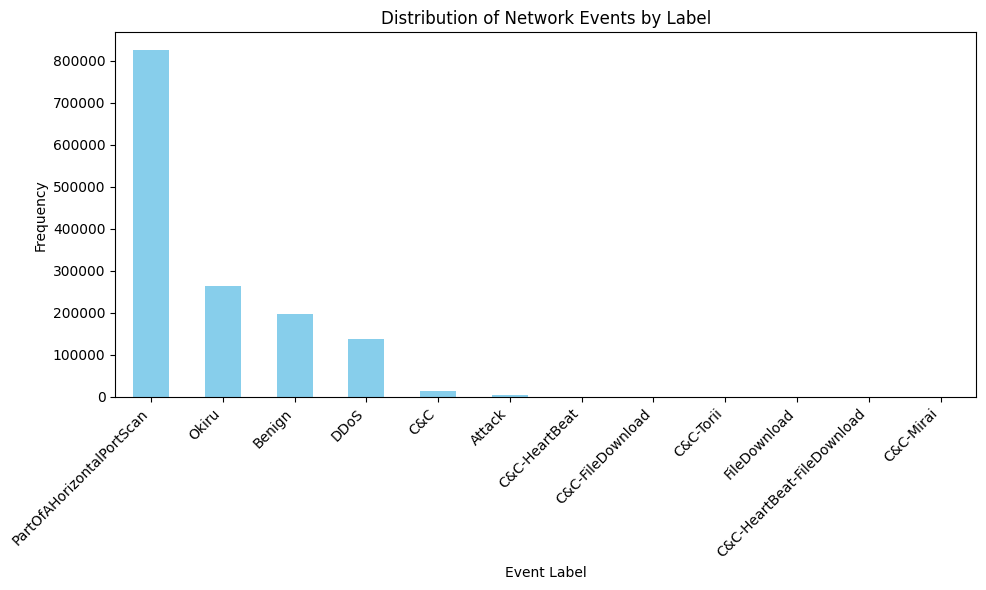

In [9]:
event_label_counts = df['label'].value_counts()

# Visualization: Bar chart displaying the frequency of each network event type
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
event_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Network Events by Label')
plt.xlabel('Event Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels to fit them better
plt.tight_layout()  # Adjust the layout to make room for the rotated labels

plt.show()

In [10]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: count, dtype: int64

In [11]:
df['label'].replace({'C&C-HeartBeat': 'C&C',
                       'C&C-Torii': 'C&C',
                        'C&C-FileDownload': 'C&C',
                        'C&C-HeartBeat-FileDownload':'C&C',
                        'C&C-Mirai': 'C&C'}, inplace=True)

In [12]:
df.label.unique()

array(['PartOfAHorizontalPortScan', 'Benign', 'Okiru', 'DDoS', 'C&C',
       'Attack', 'FileDownload'], dtype=object)

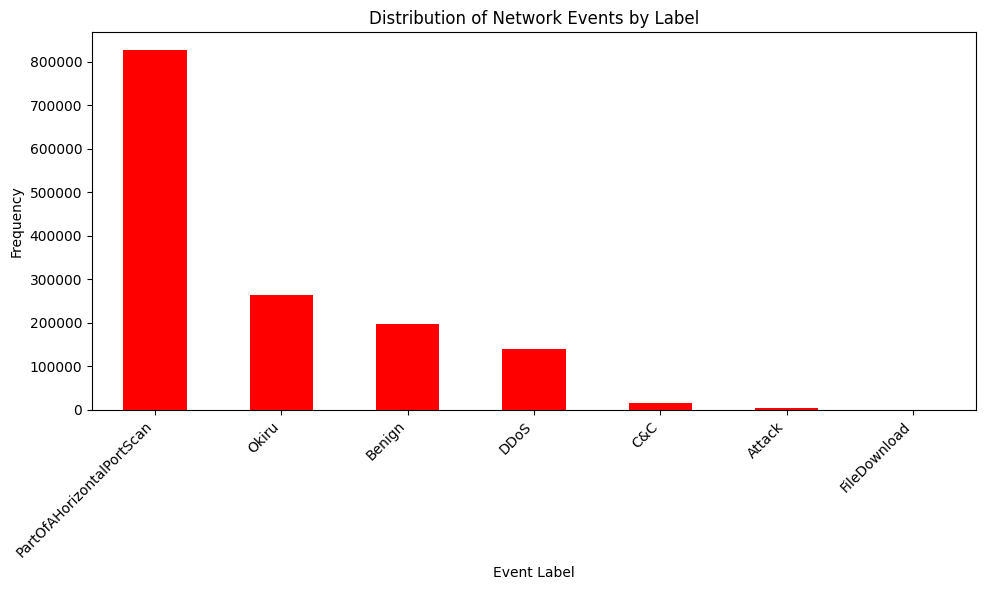

In [13]:
event_label_counts = df['label'].value_counts()

# Visualization: Bar chart displaying the frequency of each network event type
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
event_label_counts.plot(kind='bar', color='red')
plt.title('Distribution of Network Events by Label')
plt.xlabel('Event Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels to fit them better
plt.tight_layout()  # Adjust the layout to make room for the rotated labels

plt.show()

## 4. Data Preprocessing

In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   duration           1444674 non-null  float64
 1   orig_bytes         1444674 non-null  int64  
 2   resp_bytes         1444674 non-null  int64  
 3   missed_bytes       1444674 non-null  float64
 4   orig_pkts          1444674 non-null  float64
 5   orig_ip_bytes      1444674 non-null  float64
 6   resp_pkts          1444674 non-null  float64
 7   resp_ip_bytes      1444674 non-null  float64
 8   label              1444674 non-null  object 
 9   proto_icmp         1444674 non-null  bool   
 10  proto_tcp          1444674 non-null  bool   
 11  proto_udp          1444674 non-null  bool   
 12  conn_state_OTH     1444674 non-null  bool   
 13  conn_state_REJ     1444674 non-null  bool   
 14  conn_state_RSTO    1444674 non-null  bool   
 15  conn_state_RSTOS0  1444674 non-n

In [16]:
df.shape

(1444674, 25)

In [17]:
# Step 1: Check for duplicated rows
duplicates = df.duplicated()

# Step 2: Count the occurrences of duplicates
duplicate_counts = duplicates.sum()
print("Number of duplicated rows:", duplicate_counts)

Number of duplicated rows: 1398033


In [18]:
# Step 3: Remove duplicated rows
df = df.drop_duplicates()

# Step 4: Verify that duplicates have been removed
duplicates_after_removal = df.duplicated().sum()
print("Number of duplicated rows after removal:", duplicates_after_removal)

Number of duplicated rows after removal: 0


In [19]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
8,2.999300,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False


In [20]:
df.shape

(46641, 25)

In [21]:
df.duration.unique()

array([ 2.998796,  0.      ,  2.998804, ..., 47.719591, 32.008033,
       16.001901])

In [22]:
df = df[(df['duration'] >= 0)]

#  Print the resulting dataset
df.duration.unique()

array([ 2.998796,  0.      ,  2.998804, ..., 47.719591, 32.008033,
       16.001901])

In [23]:
df.shape

(46542, 25)

In [24]:
df['label'].value_counts()

label
Benign                       24540
PartOfAHorizontalPortScan    12369
C&C                           5618
Attack                        3814
Okiru                          163
DDoS                            36
FileDownload                     2
Name: count, dtype: int64

In [25]:
# Assuming df is your DataFrame
df = df[df['label'] != 'FileDownload']

In [26]:
df['label'].value_counts()

label
Benign                       24540
PartOfAHorizontalPortScan    12369
C&C                           5618
Attack                        3814
Okiru                          163
DDoS                            36
Name: count, dtype: int64

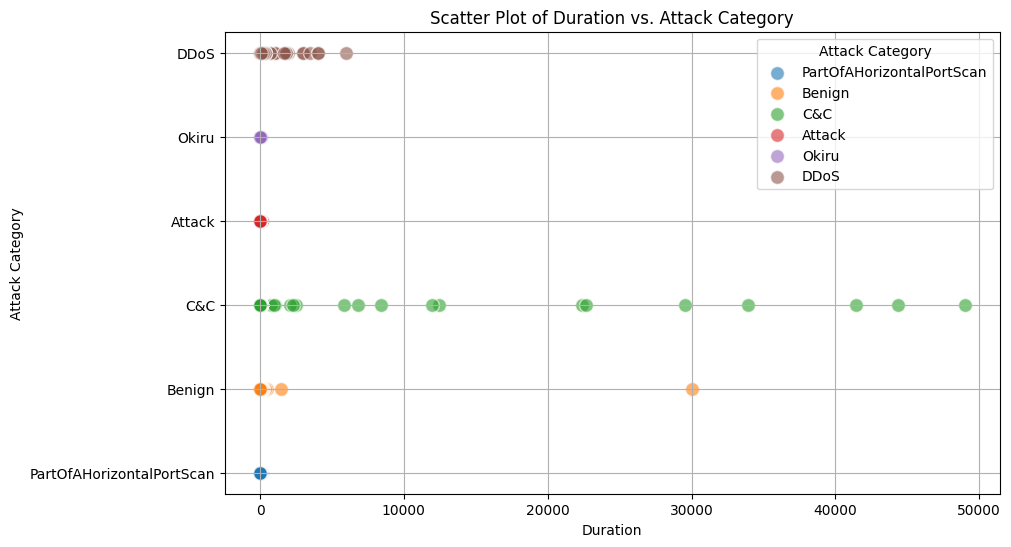

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
categories = df['label'].unique()

for category in categories:
    subset = df[df['label'] == category]
    plt.scatter(subset['duration'], [category]*len(subset), label=category, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Duration')
plt.ylabel('Attack Category') 
plt.title('Scatter Plot of Duration vs. Attack Category')
plt.legend(title='Attack Category')
plt.grid(True)
plt.show()

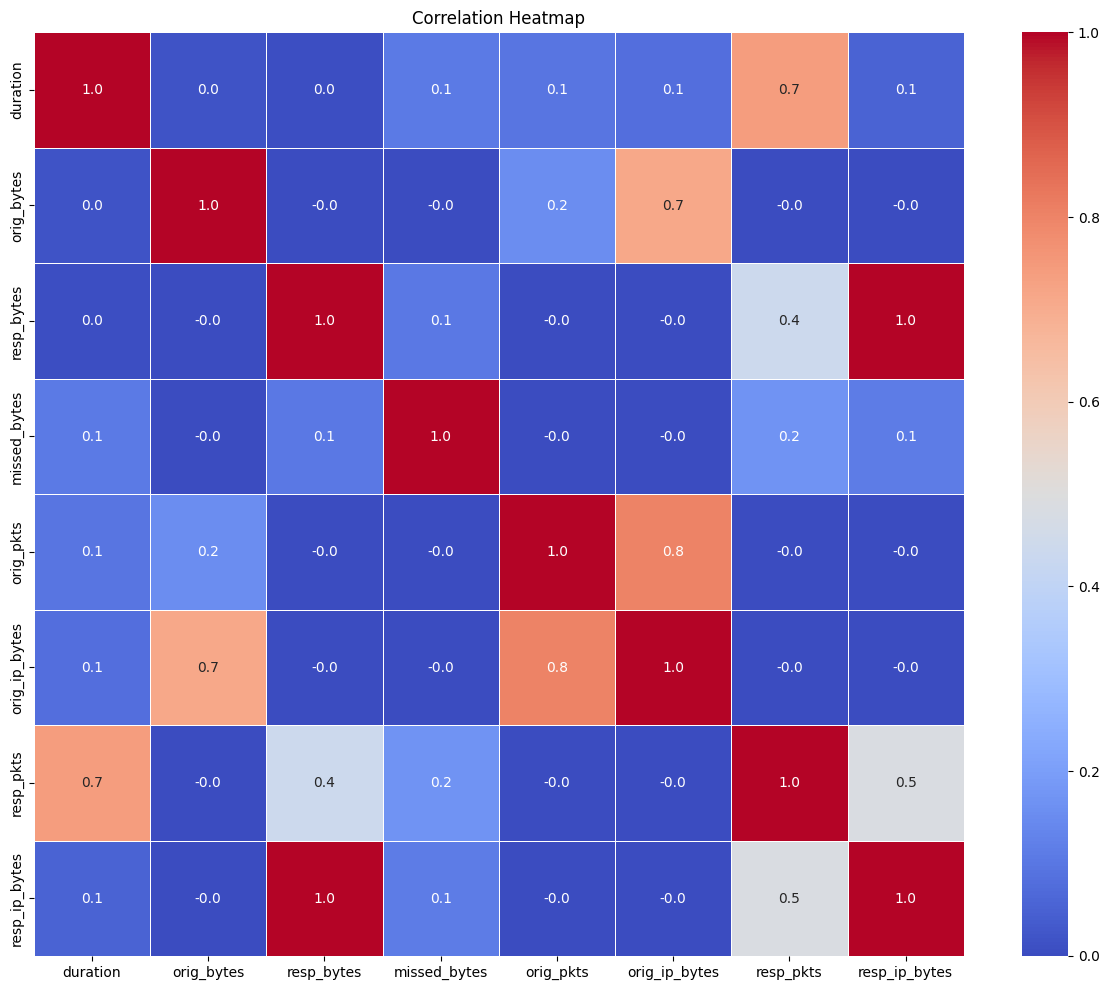

In [28]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f")

plt.title('Correlation Heatmap')
plt.show()

## 5. Data Transformation

In [29]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [30]:
# Apply SMOTE for oversampling the minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [31]:
# Define features and target
X = df.drop(['label'], axis=1)
y = df['label']

In [32]:
# transform the dataset
X, y = smote.fit_resample(X, y)

In [33]:
y

0         PartOfAHorizontalPortScan
1         PartOfAHorizontalPortScan
2                            Benign
3                            Benign
4         PartOfAHorizontalPortScan
                    ...            
147235    PartOfAHorizontalPortScan
147236    PartOfAHorizontalPortScan
147237    PartOfAHorizontalPortScan
147238    PartOfAHorizontalPortScan
147239    PartOfAHorizontalPortScan
Name: label, Length: 147240, dtype: object

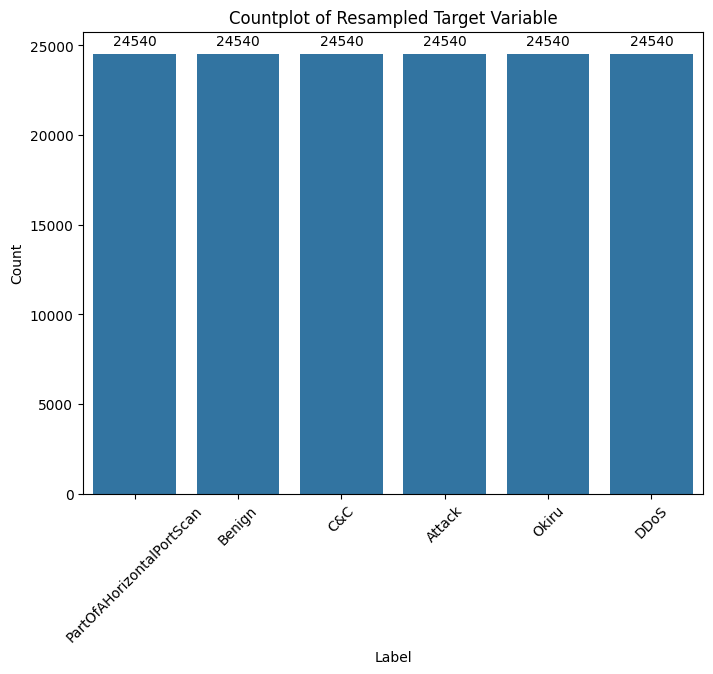

In [34]:
# Combine resampled features and target into a new DataFrame
df_resampled = pd.DataFrame(X, columns=X.columns)
df_resampled['label'] = y

# Plot the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y)
plt.title('Countplot of Resampled Target Variable')
plt.xticks(rotation=45)
plt.xlabel('Label')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points')

plt.show()

## 6. Data Preparation

In [35]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

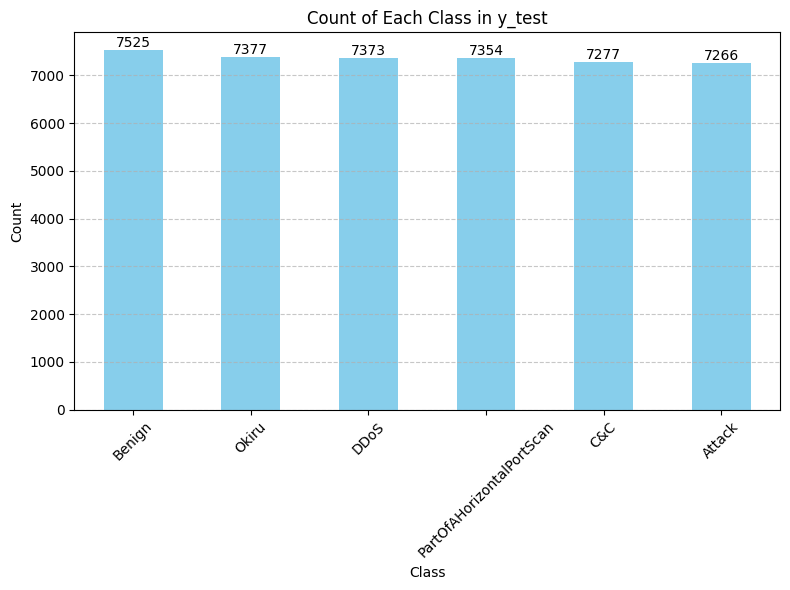

In [36]:
import matplotlib.pyplot as plt

# Sample data (assuming class_counts contains the counts)
class_counts = y_test.value_counts()

# Plotting
plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Class in y_test')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of each bar
for i in bars.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             f'{int(i.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Data Modeling

### 7.1 Decision Trees Classifier

In [38]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Start time
start_time = time.time()

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# End time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("DT model trained in {:.2f} seconds.".format(elapsed_time))

DT model trained in 0.77 seconds.


In [39]:
# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy of DT Model:", accuracy_dt)

print("Classification Report DT Model:")
print(classification_report(y_test, y_pred))

Accuracy of DT Model: 0.8823010051616409
Classification Report DT Model:
                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4846
                   Benign       0.66      0.65      0.65      4980
                      C&C       0.68      0.69      0.69      4822
                     DDoS       1.00      1.00      1.00      4970
                    Okiru       1.00      1.00      1.00      4957
PartOfAHorizontalPortScan       0.96      0.95      0.96      4873

                 accuracy                           0.88     29448
                macro avg       0.88      0.88      0.88     29448
             weighted avg       0.88      0.88      0.88     29448



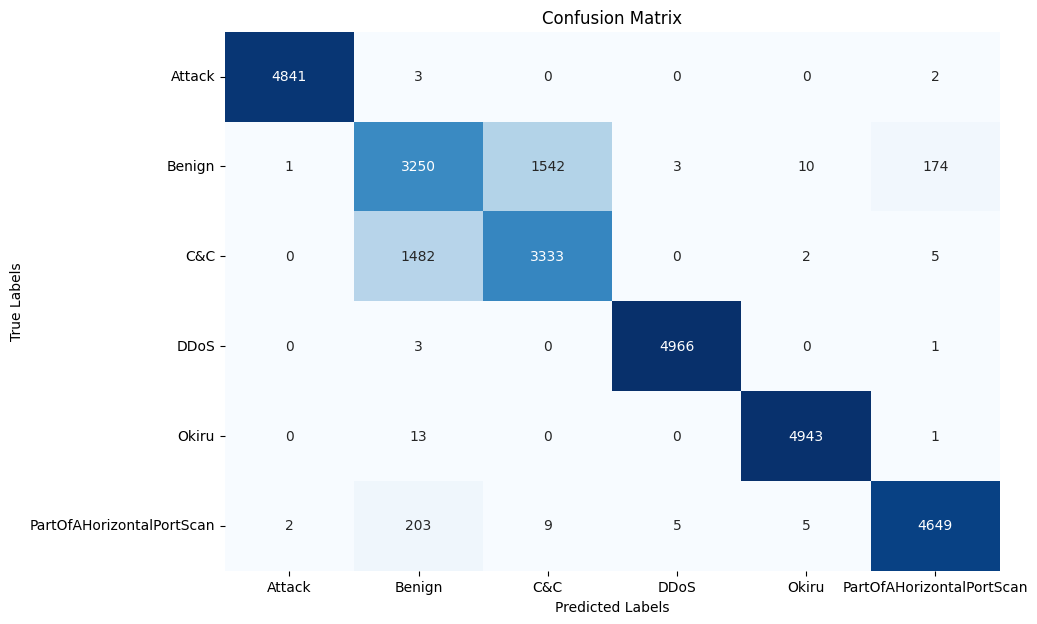

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = dt_classifier.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 3.502073450149905


### 7.2 Random Forest Classifier

#### 7.2.1 Baseline Model

In [42]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth=5)  # You can adjust the number of trees with n_estimators

# Start time
start_time = time.time()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)


# End time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("RF model trained in {:.2f} seconds.".format(elapsed_time))


# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RF Model:", accuracy)

print("Classification Report RF Model:")
print(classification_report(y_test, y_pred))

RF model trained in 4.26 seconds.
Accuracy of RF Model: 0.8518065743004618
Classification Report RF Model:
                           precision    recall  f1-score   support

                   Attack       1.00      0.99      0.99      4846
                   Benign       0.98      0.22      0.36      4980
                      C&C       0.57      0.98      0.72      4822
                     DDoS       1.00      0.99      1.00      4970
                    Okiru       0.90      0.99      0.94      4957
PartOfAHorizontalPortScan       0.95      0.95      0.95      4873

                 accuracy                           0.85     29448
                macro avg       0.90      0.85      0.83     29448
             weighted avg       0.90      0.85      0.83     29448



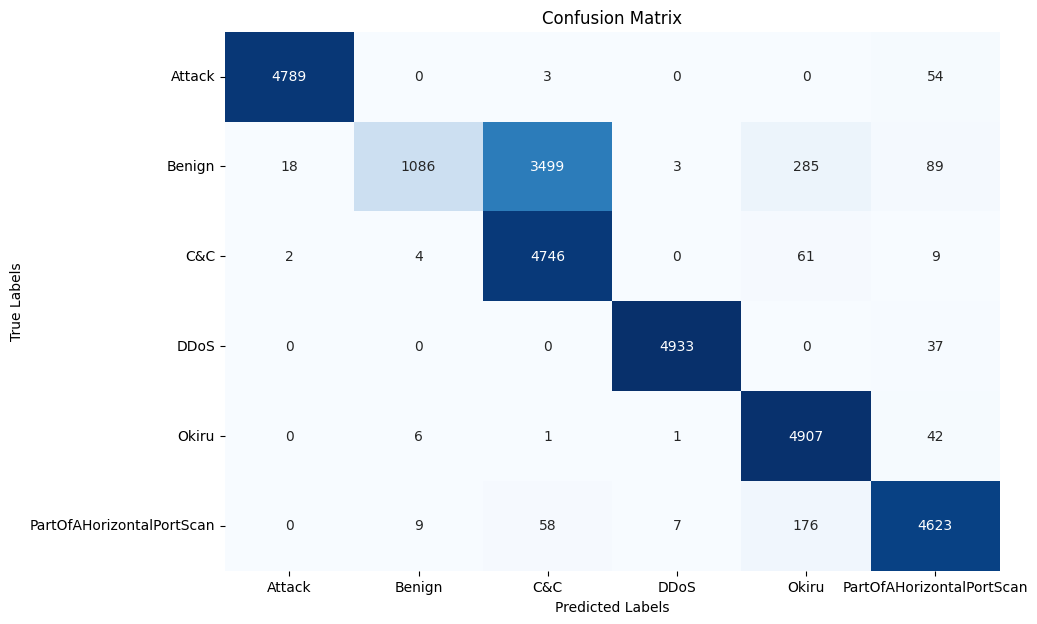

In [43]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = rf_classifier.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.4642559687805912


#### 7.2.2 Hyperparameter Tuned Model

In [45]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2' ], 
    'max_depth': [3, 6], 
    'max_leaf_nodes': [3, 6], 
} 

In [46]:
# Create a based model
rf = RandomForestClassifier()


grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, n_estimators=150)


In [47]:
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features="log2", 
                                    n_estimators=150) 

# Start time
start_time = time.time()

model_grid.fit(X_train, y_train) 

# End time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("RF model trained in {:.2f} seconds.".format(elapsed_time))


y_pred_grid = model_grid.predict(X_test) 

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_grid)
print("Accuracy of RF Model:", accuracy_rf)

print("Classification Report RF Model:")
print(classification_report(y_test, y_pred_grid))

RF model trained in 7.05 seconds.
Accuracy of RF Model: 0.8563569682151589
Classification Report RF Model:
                           precision    recall  f1-score   support

                   Attack       1.00      0.99      0.99      4846
                   Benign       0.97      0.23      0.37      4980
                      C&C       0.58      0.98      0.73      4822
                     DDoS       1.00      1.00      1.00      4970
                    Okiru       0.90      1.00      0.95      4957
PartOfAHorizontalPortScan       0.97      0.96      0.96      4873

                 accuracy                           0.86     29448
                macro avg       0.90      0.86      0.83     29448
             weighted avg       0.90      0.86      0.83     29448



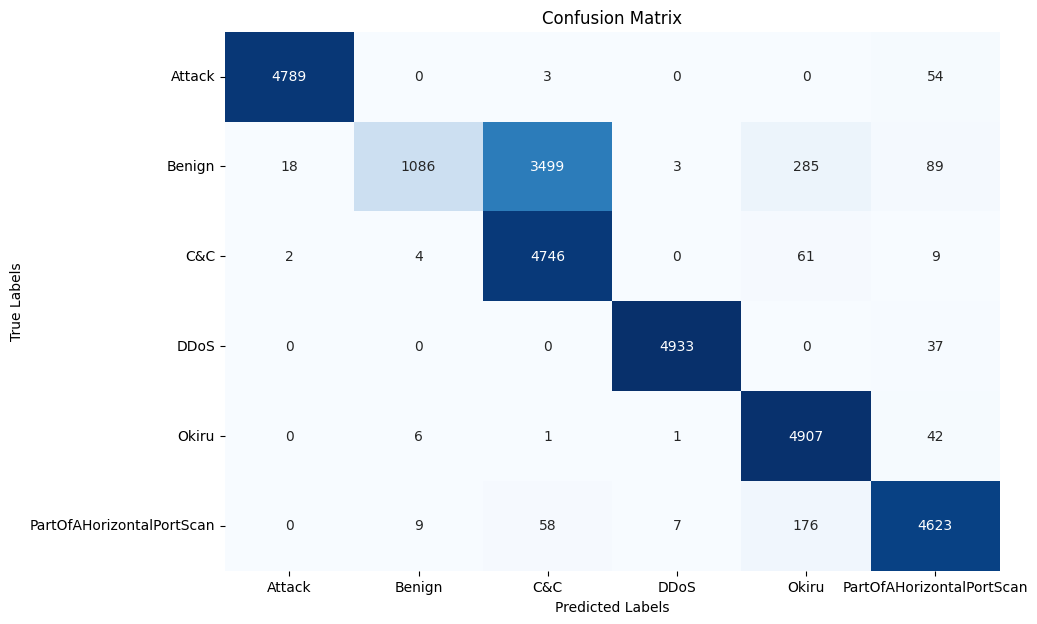

In [48]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = model_grid.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.3967374016220198


### 7.3 KNearest Neighbors Classifier

#### 7.3.1 Baseline Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create an knn classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Start time
start_time = time.time()

# Train the XGBoost classifier
knn.fit(X_train, y_train)


# End time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("KNN model trained in {:.2f} seconds.".format(elapsed_time))

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Model:", accuracy)

print("Classification Report KNN Model:")
print(classification_report(y_test, y_pred))

KNN model trained in 0.10 seconds.
Accuracy of KNN Model: 0.9154441727791361
Classification Report KNN Model:
                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4846
                   Benign       0.80      0.68      0.73      4980
                      C&C       0.74      0.84      0.79      4822
                     DDoS       1.00      1.00      1.00      4970
                    Okiru       1.00      1.00      1.00      4957
PartOfAHorizontalPortScan       0.97      0.98      0.97      4873

                 accuracy                           0.92     29448
                macro avg       0.92      0.92      0.91     29448
             weighted avg       0.92      0.92      0.91     29448



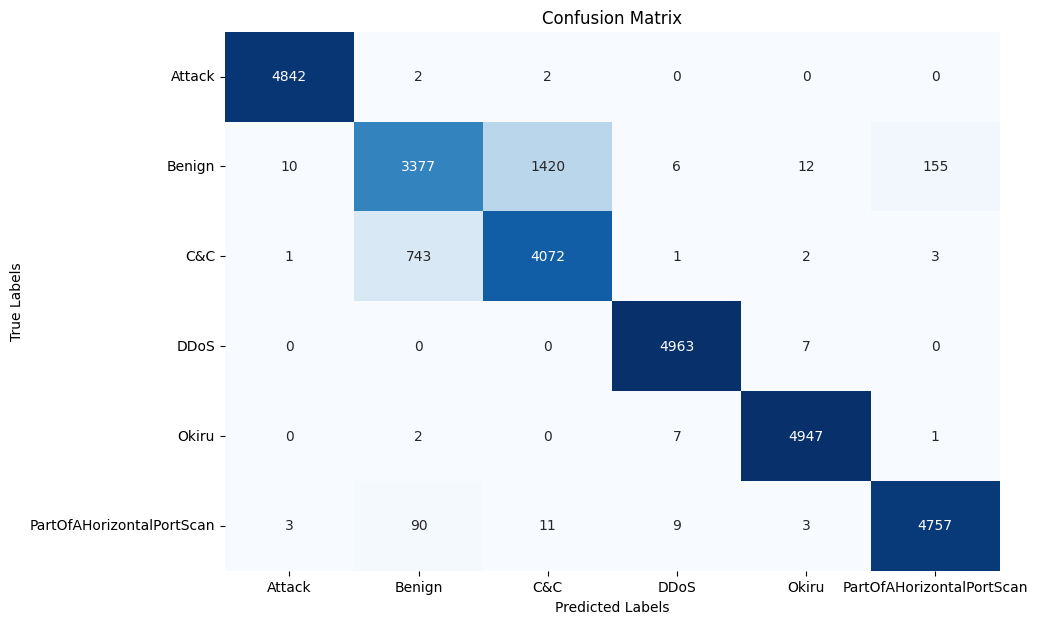

In [51]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = knn.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.6126300989262695


#### 7.3.2 Hyperparameter Tuned Model

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # List of K values to try

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameter found
print("Best K value:", grid_search.best_params_['n_neighbors'])

# Get the best model
best_knn = grid_search.best_estimator_

# Predictions
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Model:", accuracy_knn)

print("Classification Report KNN Model:")
print(classification_report(y_test, y_pred))

Best K value: 9
Accuracy of KNN Model: 0.9202322738386308
Classification Report KNN Model:
                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4846
                   Benign       0.83      0.68      0.75      4980
                      C&C       0.75      0.87      0.80      4822
                     DDoS       0.99      1.00      1.00      4970
                    Okiru       0.99      1.00      1.00      4957
PartOfAHorizontalPortScan       0.97      0.98      0.97      4873

                 accuracy                           0.92     29448
                macro avg       0.92      0.92      0.92     29448
             weighted avg       0.92      0.92      0.92     29448



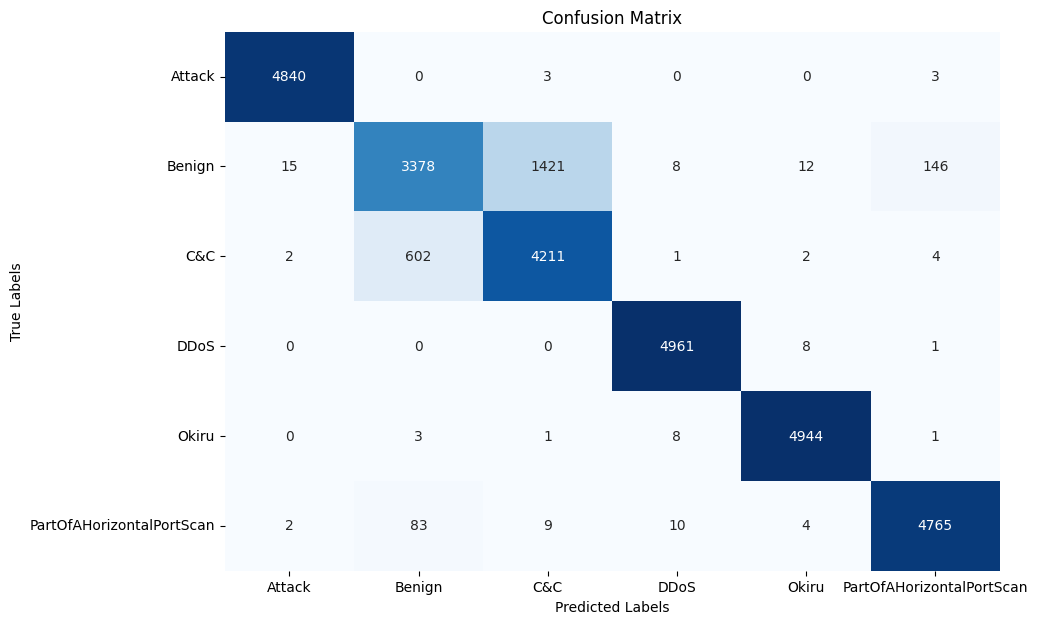

In [54]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting with seaborn
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = grid_search.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.31956093132389596


### 7.4 XGBoost Classifier

In [56]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test using the fitted LabelEncoder
y_test_encoded = label_encoder.transform(y_test)

# Printing the classes and their corresponding encoded values
print("Classes and their encoded values:")
for cls, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(cls, "-->", encoded_value)

Classes and their encoded values:
Attack --> 0
Benign --> 1
C&C --> 2
DDoS --> 3
Okiru --> 4
PartOfAHorizontalPortScan --> 5


In [57]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Start time
start_time = time.time()

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train_encoded)


# End time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("XGBoost model trained in {:.2f} seconds.".format(elapsed_time))

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of XGBoost Model:", accuracy_xgb)

print("Classification Report XGBoost Model:")
print(classification_report(y_test_encoded, y_pred))

XGBoost model trained in 1.20 seconds.
Accuracy of XGBoost Model: 0.8814860092366205
Classification Report XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4846
           1       0.68      0.58      0.63      4980
           2       0.65      0.73      0.69      4822
           3       1.00      1.00      1.00      4970
           4       1.00      1.00      1.00      4957
           5       0.97      0.98      0.97      4873

    accuracy                           0.88     29448
   macro avg       0.88      0.88      0.88     29448
weighted avg       0.88      0.88      0.88     29448



In [58]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for each class
y_prob = grid_search.predict_proba(X_test)  # Assuming dt_classifier is the trained Decision Tree classifier

# Calculate the log loss
logloss = log_loss(y_test, y_prob)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.31956093132389596


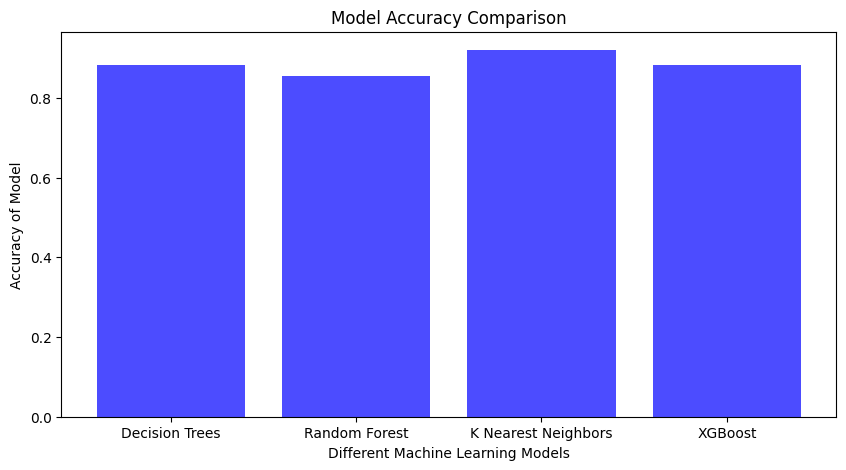

In [59]:
import matplotlib.pyplot as plt



# List of variable names and their corresponding values
labels = ['Decision Trees', 'Random Forest', 'K Nearest Neighbors', 'XGBoost']
values = [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_xgb]

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='b', alpha=0.7)
plt.xlabel('Different Machine Learning Models')
plt.ylabel('Accuracy of Model')
plt.title('Model Accuracy Comparison')
plt.show()


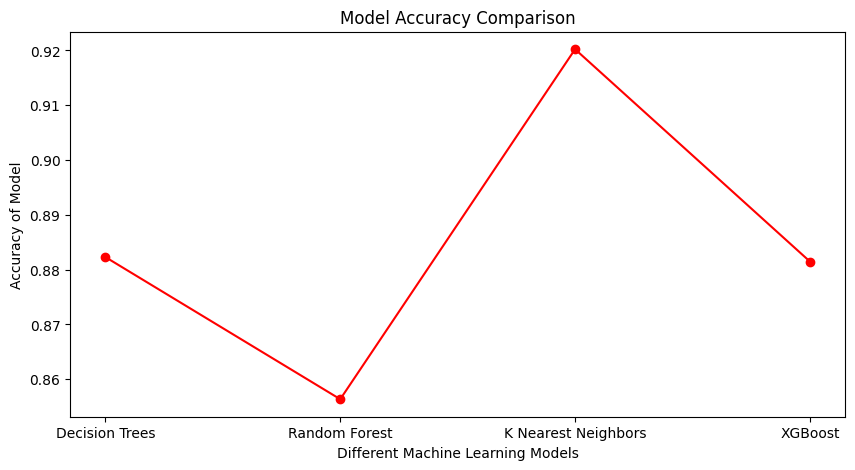

In [60]:
# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(labels, values, color='r', marker='o')
plt.xlabel('Different Machine Learning Models')
plt.ylabel('Accuracy of Model')
plt.title('Model Accuracy Comparison')
plt.show()

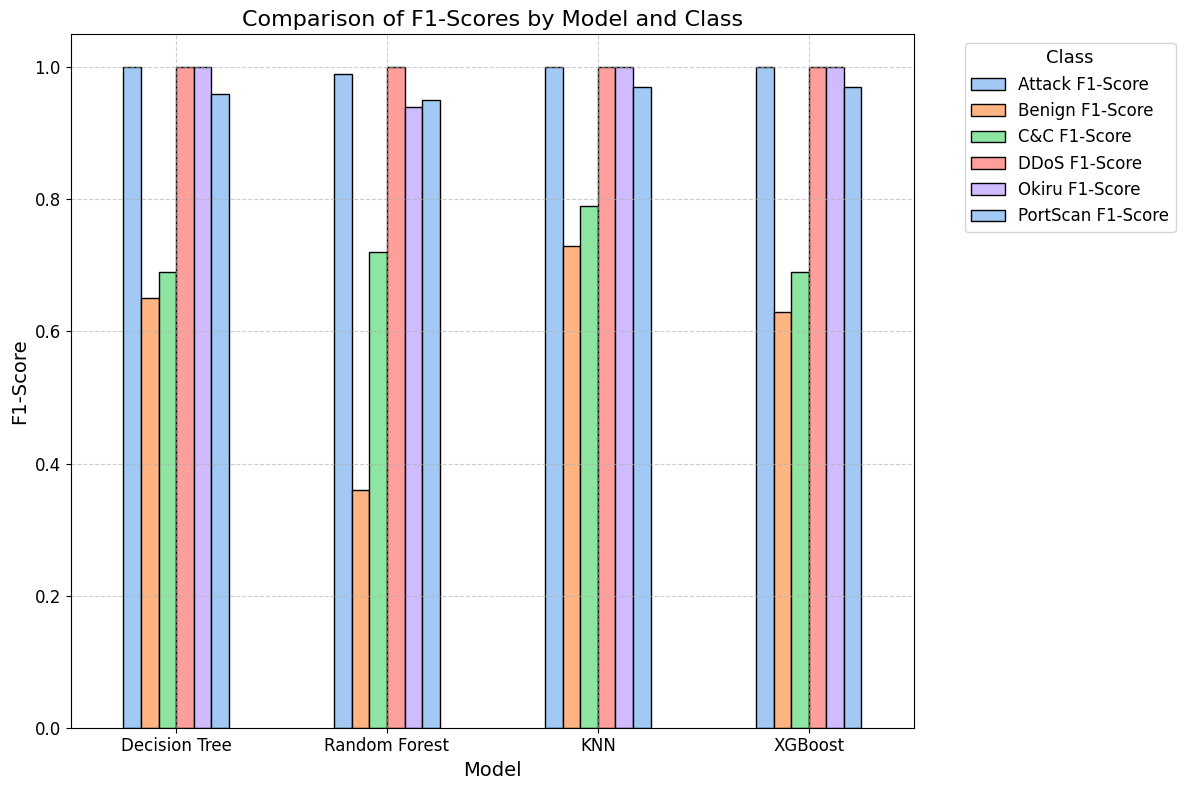

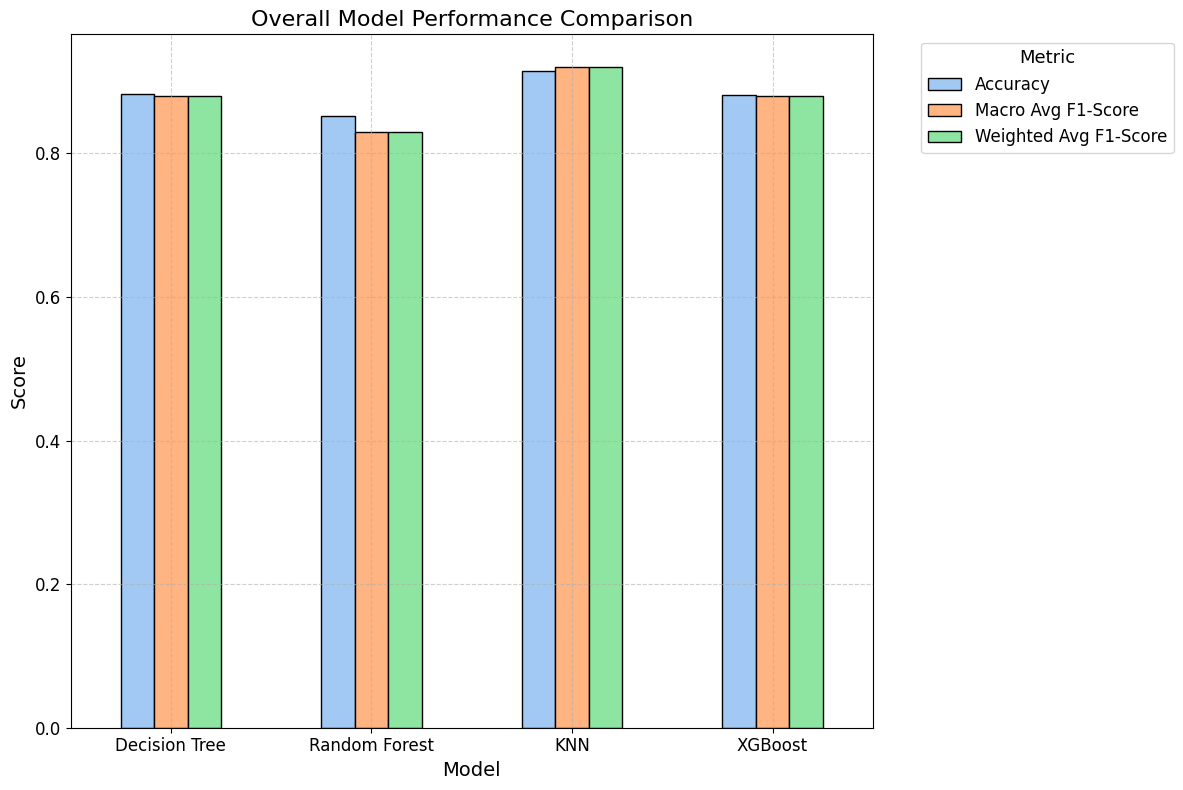

In [63]:
data = {
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'XGBoost'],
    'Accuracy': [0.8823, 0.8518, 0.9154, 0.8815],
    'Macro Avg F1-Score': [0.88, 0.83, 0.92, 0.88],
    'Weighted Avg F1-Score': [0.88, 0.83, 0.92, 0.88],
    'Attack F1-Score': [1.00, 0.99, 1.00, 1.00],
    'Benign F1-Score': [0.65, 0.36, 0.73, 0.63],
    'C&C F1-Score': [0.69, 0.72, 0.79, 0.69],
    'DDoS F1-Score': [1.00, 1.00, 1.00, 1.00],
    'Okiru F1-Score': [1.00, 0.94, 1.00, 1.00],
    'PortScan F1-Score': [0.96, 0.95, 0.97, 0.97]
}

df1 = pd.DataFrame(data)

# Color palette
colors = sns.color_palette('pastel')[0:5]

# Plotting the comparison of F1-Scores for each class
fig, ax = plt.subplots(figsize=(12, 8))
df.set_index('Model').iloc[:, 3:].plot(kind='bar', ax=ax, color=colors, edgecolor='black')
plt.title('Comparison of F1-Scores by Model and Class', fontsize=16)
plt.ylabel('F1-Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Class', fontsize=12, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plotting overall accuracy and average metrics
fig, ax = plt.subplots(figsize=(12, 8))
df.set_index('Model')[['Accuracy', 'Macro Avg F1-Score', 'Weighted Avg F1-Score']].plot(kind='bar', ax=ax, color=colors, edgecolor='black')
plt.title('Overall Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metric', fontsize=12, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming a DataFrame that directly corresponds to model outputs
data1 = {
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'XGBoost'] * 3,  # Repeat for each metric
    'Metric': ['F1-Score', 'F1-Score', 'F1-Score', 'F1-Score',
               'Recall', 'Recall', 'Recall', 'Recall',
               'Precision', 'Precision', 'Precision', 'Precision'],
    'Attack': [1.00, 0.99, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    'Benign': [0.65, 0.36, 0.73, 0.63, 0.65, 0.22, 0.68, 0.58, 0.66, 0.98, 0.80, 0.68],
    'C&C': [0.69, 0.72, 0.79, 0.69, 0.68, 0.98, 0.84, 0.73, 0.68, 0.57, 0.74, 0.65],
    # Add other classes if needed
}

df2 = pd.DataFrame(data1)


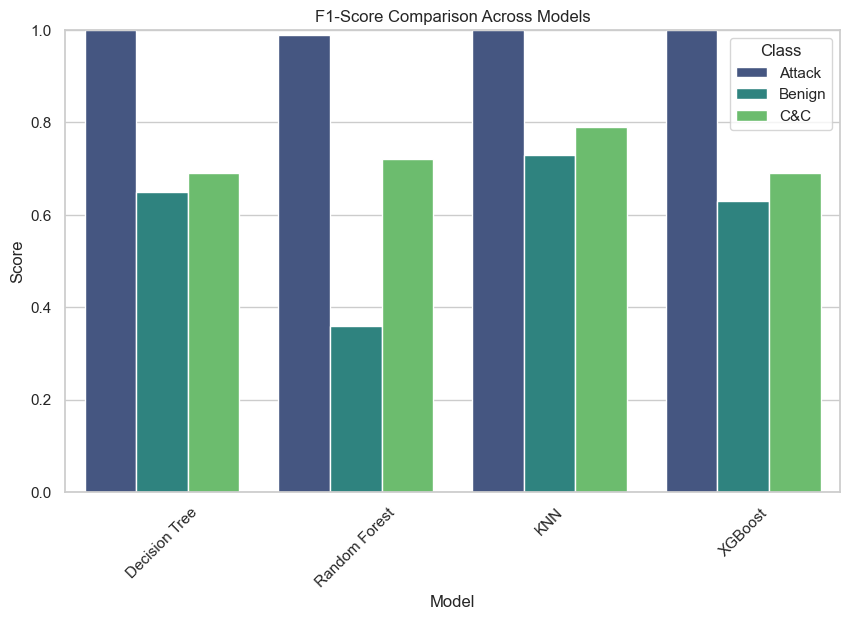

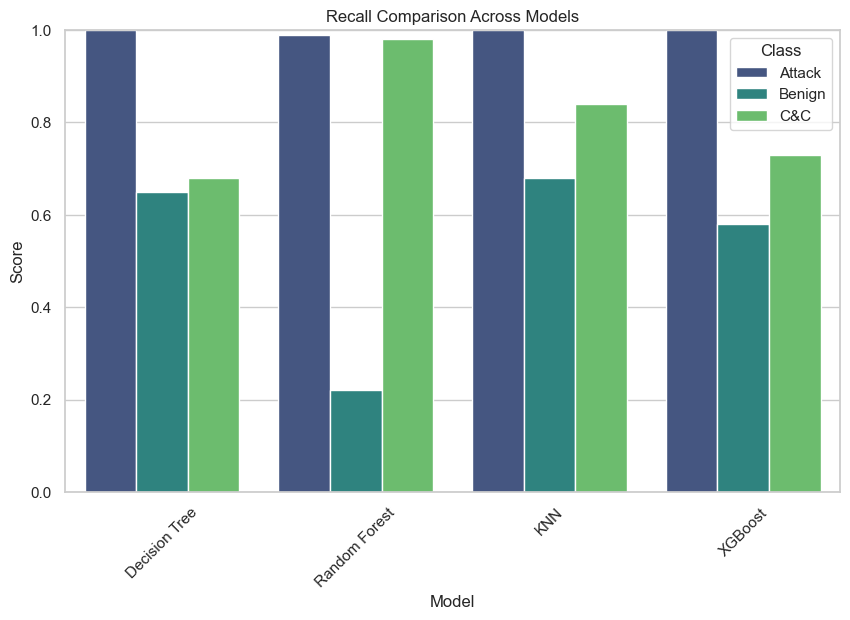

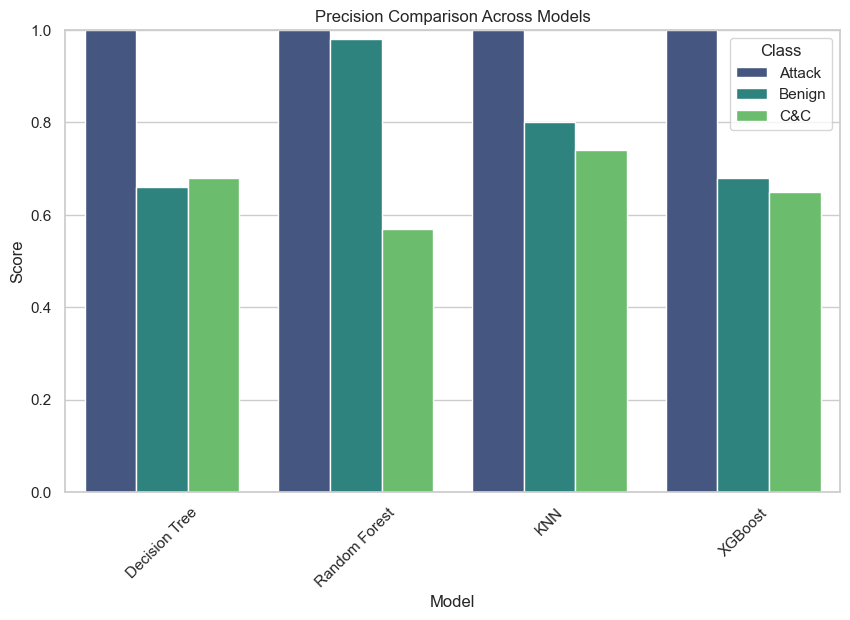

In [70]:
metrics = df2['Metric'].unique()
classes = ['Attack', 'Benign', 'C&C']  # Extend this list as needed based on your classes

# Function to plot each metric separately
def plot_metric(metric):
    plt.figure(figsize=(10, 6))  # Adjust figsize for each plot
    temp_df = df2[df2['Metric'] == metric]
    melted_df = temp_df.melt(id_vars=['Model', 'Metric'], value_vars=classes, var_name='Class', value_name='Score')
    sns.barplot(data=melted_df, x='Model', y='Score', hue='Class', palette='viridis')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Normalize the scale
    plt.xticks(rotation=45)  # Improve x-axis label readability
    plt.show()

# Plot each metric in a separate graph
for metric in metrics:
    plot_metric(metric)

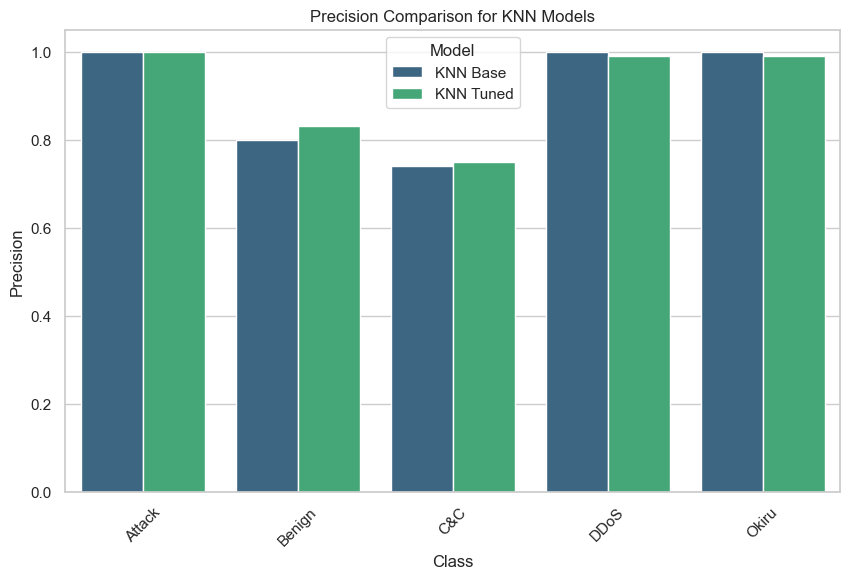

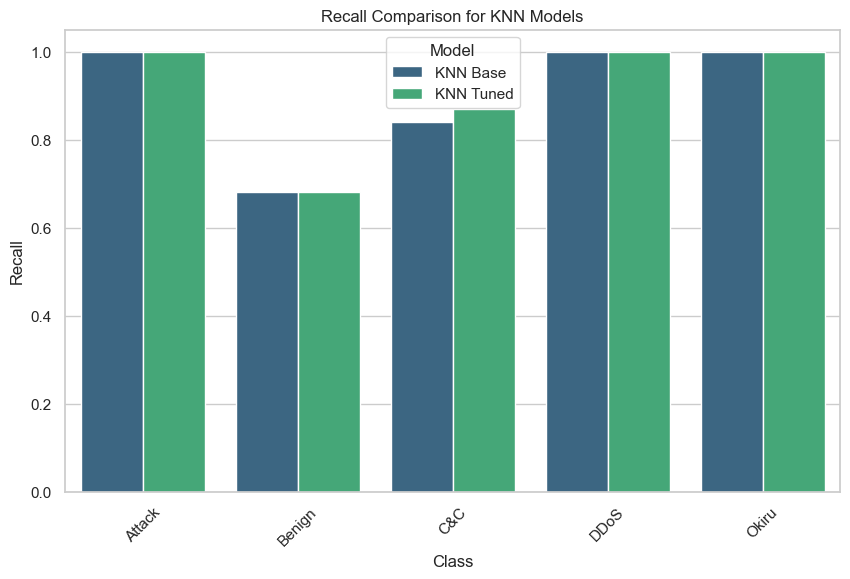

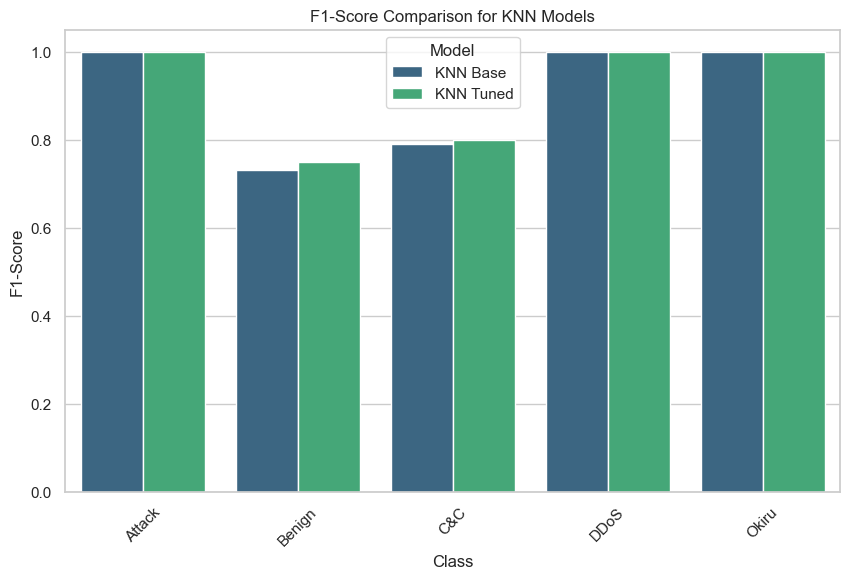

In [77]:

data = [
    {'Model': 'KNN Base', 'Class': 'Attack', 'Precision': 1.00, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'KNN Base', 'Class': 'Benign', 'Precision': 0.80, 'Recall': 0.68, 'F1-Score': 0.73},
    {'Model': 'KNN Base', 'Class': 'C&C', 'Precision': 0.74, 'Recall': 0.84, 'F1-Score': 0.79},
    {'Model': 'KNN Base', 'Class': 'DDoS', 'Precision': 1.00, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'KNN Base', 'Class': 'Okiru', 'Precision': 1.00, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'KNN Tuned', 'Class': 'Attack', 'Precision': 1.00, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'KNN Tuned', 'Class': 'Benign', 'Precision': 0.83, 'Recall': 0.68, 'F1-Score': 0.75},
    {'Model': 'KNN Tuned', 'Class': 'C&C', 'Precision': 0.75, 'Recall': 0.87, 'F1-Score': 0.80},
    {'Model': 'KNN Tuned', 'Class': 'DDoS', 'Precision': 0.99, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'KNN Tuned', 'Class': 'Okiru', 'Precision': 0.99, 'Recall': 1.00, 'F1-Score': 1.00}
]

df3 = pd.DataFrame(data)

def plot_metric(metric):
    plt.figure(figsize=(10, 6))  # Set figure size for each metric
    sns.barplot(data=df3, x='Class', y=metric, hue='Model', palette='viridis')
    plt.title(f'{metric} Comparison for KNN Models')
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.ylim(0, 1.05)  # Set y-limits for better visual comparison
    plt.xticks(rotation=45)  # Optional: Rotate class names for better visibility
    plt.legend(title='Model')
    plt.show()

# Call the function for each metric
plot_metric('Precision')
plot_metric('Recall')
plot_metric('F1-Score')


In [78]:
data = [
    {'Model': 'RF Base', 'Class': 'Attack', 'Precision': 1.00, 'Recall': 0.99, 'F1-Score': 0.99},
    {'Model': 'RF Base', 'Class': 'Benign', 'Precision': 0.98, 'Recall': 0.22, 'F1-Score': 0.36},
    {'Model': 'RF Base', 'Class': 'C&C', 'Precision': 0.57, 'Recall': 0.98, 'F1-Score': 0.72},
    {'Model': 'RF Base', 'Class': 'DDoS', 'Precision': 1.00, 'Recall': 0.99, 'F1-Score': 1.00},
    {'Model': 'RF Base', 'Class': 'Okiru', 'Precision': 0.90, 'Recall': 0.99, 'F1-Score': 0.94},
    {'Model': 'RF Base', 'Class': 'PortScan', 'Precision': 0.95, 'Recall': 0.95, 'F1-Score': 0.95},
    {'Model': 'RF Tuned', 'Class': 'Attack', 'Precision': 1.00, 'Recall': 0.99, 'F1-Score': 0.99},
    {'Model': 'RF Tuned', 'Class': 'Benign', 'Precision': 0.97, 'Recall': 0.23, 'F1-Score': 0.37},
    {'Model': 'RF Tuned', 'Class': 'C&C', 'Precision': 0.58, 'Recall': 0.98, 'F1-Score': 0.73},
    {'Model': 'RF Tuned', 'Class': 'DDoS', 'Precision': 1.00, 'Recall': 1.00, 'F1-Score': 1.00},
    {'Model': 'RF Tuned', 'Class': 'Okiru', 'Precision': 0.90, 'Recall': 1.00, 'F1-Score': 0.95},
    {'Model': 'RF Tuned', 'Class': 'PortScan', 'Precision': 0.97, 'Recall': 0.96, 'F1-Score': 0.96}
]

df_rf = pd.DataFrame(data)


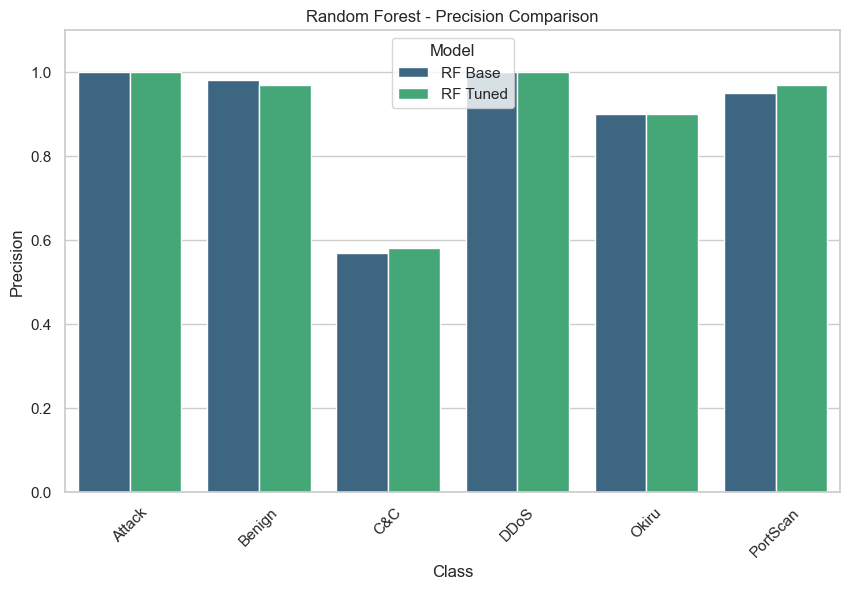

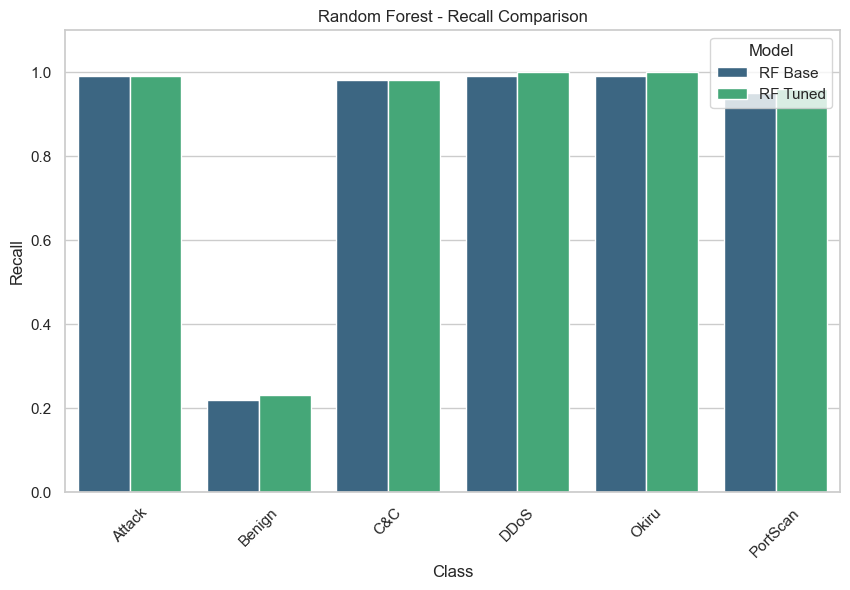

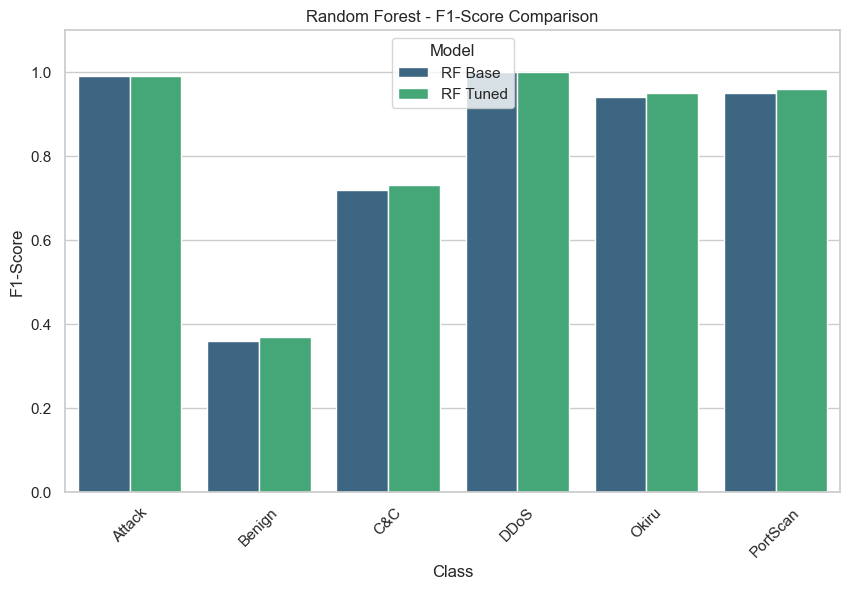

In [79]:
def plot_rf_metric(metric):
    plt.figure(figsize=(10, 6))  # Setting the figure size
    sns.barplot(data=df_rf, x='Class', y=metric, hue='Model', palette='viridis')
    plt.title(f'Random Forest - {metric} Comparison')
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.ylim(0, 1.1)  # Setting y-limits to accommodate all values
    plt.xticks(rotation=45)  # Rotate class names for better visibility
    plt.legend(title='Model')
    plt.show()

# Generate plots for each metric
plot_rf_metric('Precision')
plot_rf_metric('Recall')
plot_rf_metric('F1-Score')


Conclusion
Reflecting on the comprehensive data analysis, the K Nearest Neighbors model, particularly when tuned, emerges as the most effective model among those tested. It not only achieved the highest accuracy but also maintained a high F1-score, which confirms the ability to provide reliable and balanced classification performance across classes. Accuracy and recall metrics support this, as they show a low rate of false positives and a high rate of truly correct detections